<a href="https://colab.research.google.com/github/LinkedInLearning/deep-learning-and-generative-ai-with-python-data-preprocessing-and-analytics-3896069/blob/main/06_03_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Customer LifeTime Value

In [1]:
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping



In [2]:
#Load the dataset

cleaned_df = pd.read_csv('/content/eda_telecom.csv')

In [3]:
cleaned_df.head()

,customer_id,city,zip_code,latitude,longitude,offer,phone_service,multiple_lines,internet_service,internet_type,...,total_charges,gender,age,married,kidhome,teenhome,income,churn,CLV,total_services_used
0,0,346,93225,34.827662,-118.999073,0,1,0,1,0,...,593.30,0,37,1,0,0,30507.0,0,8773.29,5
1,1,368,91206,34.162515,-118.203869,0,1,1,1,0,...,542.40,1,46,0,0,1,59892.0,0,5492.52,3
2,2,222,92627,33.645672,-117.922613,5,1,0,1,2,...,280.85,1,50,0,0,1,70545.0,1,1661.80,3
3,3,587,94553,38.014457,-122.115432,4,1,0,1,2,...,1237.85,1,78,1,0,0,57100.0,0,20793.63,6
4,4,139,93010,34.227846,-119.079903,0,1,0,1,2,...,267.40,0,75,1,1,1,49096.0,1,868.62,4


In [4]:
# Note that CLV and Total Services Used were feature engineered in the previous lab.

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7038 entries, 0 to 7037
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7038 non-null   int64  
 1   city                    7038 non-null   int64  
 2   zip_code                7038 non-null   int64  
 3   latitude                7038 non-null   float64
 4   longitude               7038 non-null   float64
 5   offer                   7038 non-null   int64  
 6   phone_service           7038 non-null   int64  
 7   multiple_lines          7038 non-null   int64  
 8   internet_service        7038 non-null   int64  
 9   internet_type           7038 non-null   int64  
 10  gigabits_used           7038 non-null   float64
 11  online_security         7038 non-null   int64  
 12  online_backup           7038 non-null   int64  
 13  device_protection_plan  7038 non-null   int64  
 14  premium_tech_support    7038 non-null   

<Axes: >

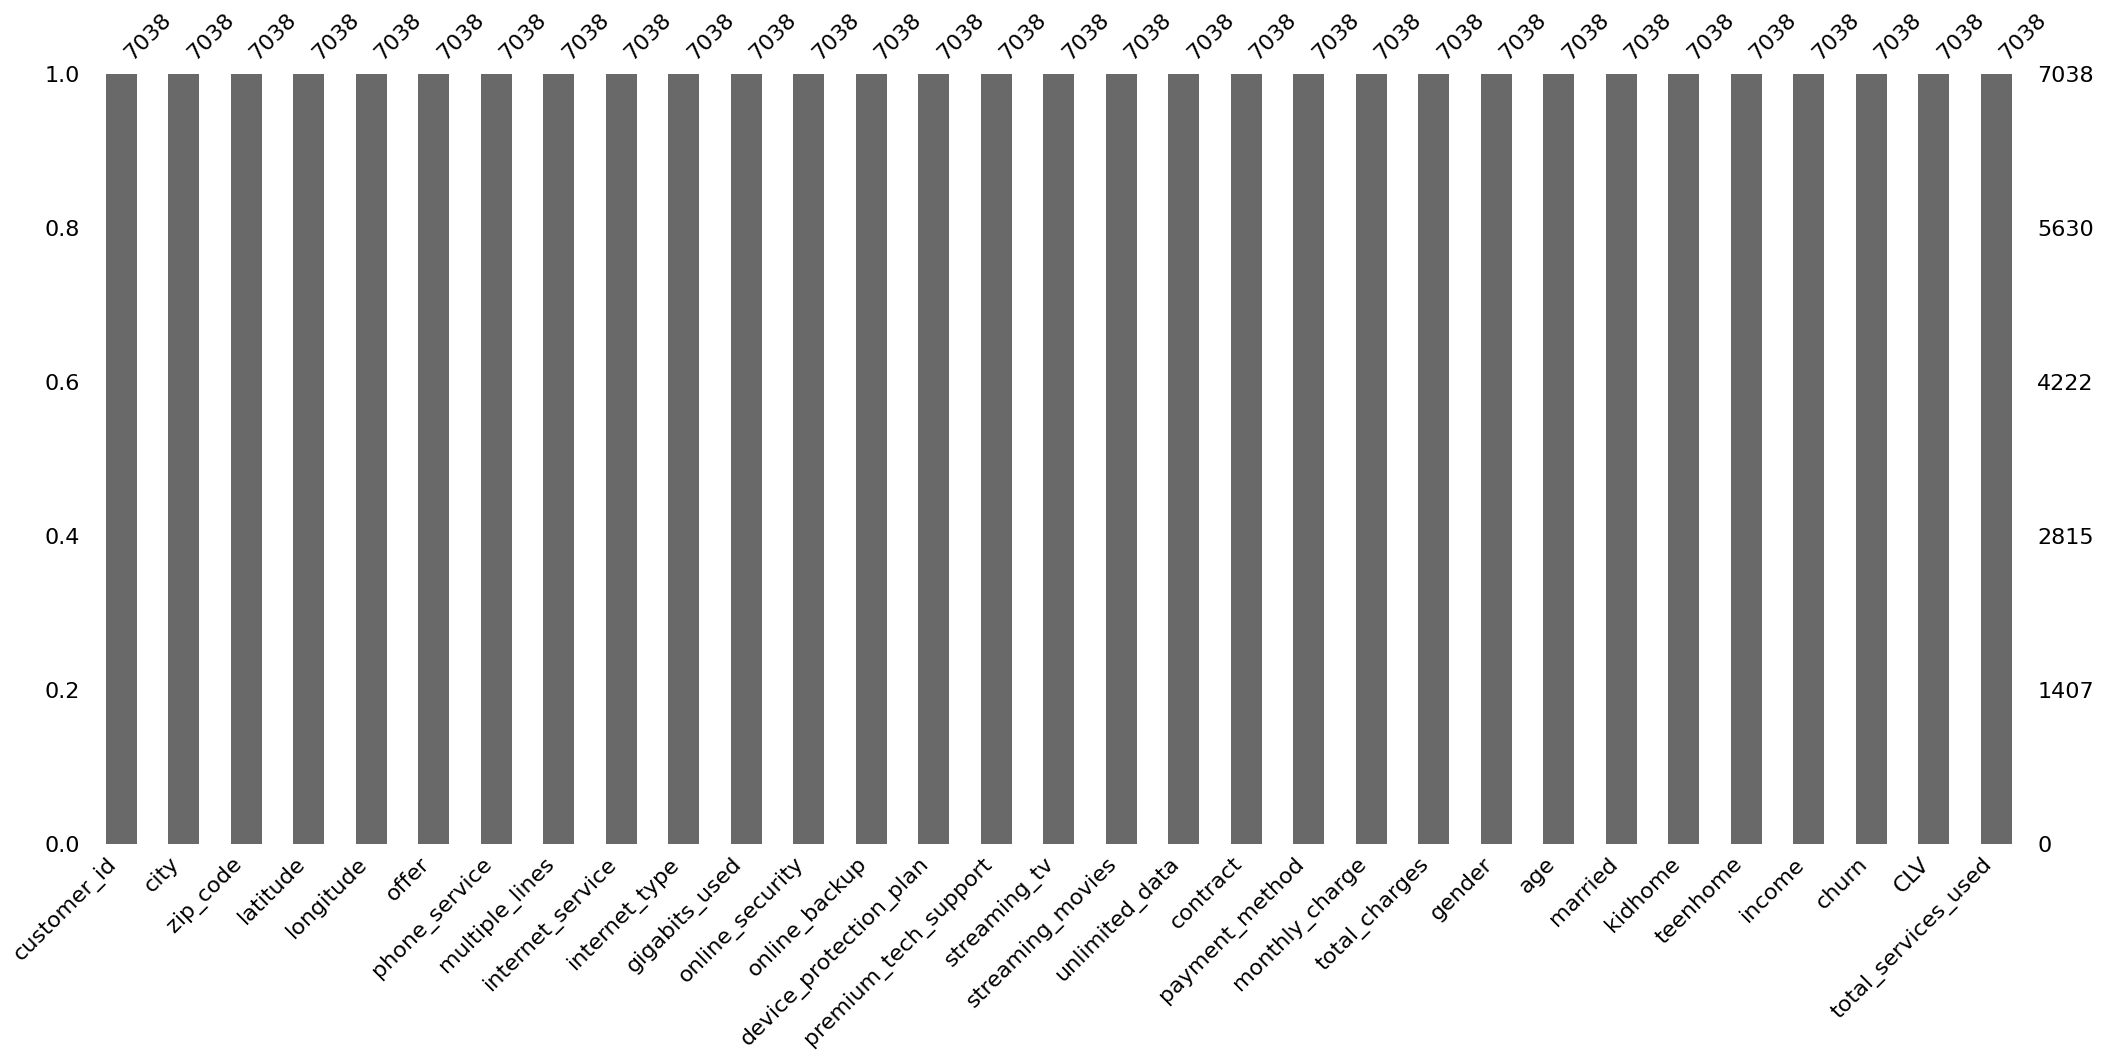

In [5]:
#Check for missing values

import missingno as msno

msno.bar(cleaned_df)

# Build and Train a Keras Sequential Model

Where all of the hard work of data preprocessing and EDA is realized!

In [6]:

# Select features and target
X = cleaned_df[['monthly_charge', 'total_charges', 'total_services_used']]
y = cleaned_df['CLV']  # target column (remember tenure*total revenue is CLV)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Assuming X_train is already defined and its shape is known
input_shape = X_train.shape[1]

# Build the model
model = Sequential()
model.add(Input(shape=(input_shape,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')

# Predict CLV
y_pred = model.predict(X_test)

# Print model summary
model.summary()




Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 65838080000.0000 - val_loss: 64670380032.0000
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 65205288960.0000 - val_loss: 64548990976.0000
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 69667135488.0000 - val_loss: 64212664320.0000
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 66318286848.0000 - val_loss: 63562440704.0000
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 62888747008.0000 - val_loss: 62514892800.0000
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64667680768.0000 - val_loss: 60987342848.0000
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 62375165952.0000 - val_loss: 59000762368.0000
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60301381632.0000 - val_loss: 56532254720.0000
Epoch 9/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55472381952.0000 - val_loss: 53535047680.0000
Epoch 10/100
141/141 ━━━━━━━━━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,109 (27.77 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,740 (18.52 KB)

# Using Data Visualization to Evaluate Model Performance

## Exercise #1. Plot the Training and Validation Loss Curves

In [ ]:
# DO NOT RUN THIS CELL. Code without comments
# Plotting the loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

### Training and Validation Loss Curves Visualization and Analysis

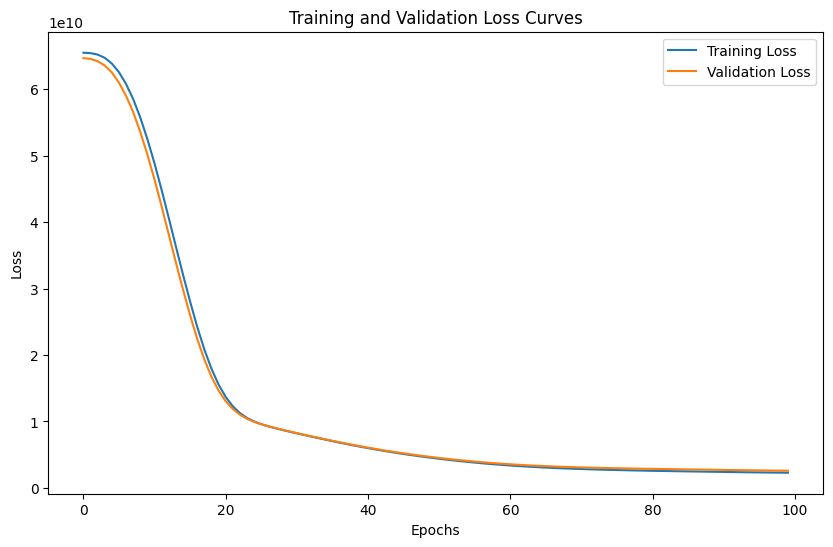

In [7]:
# Code with comments.

# Plotting the loss curves
# Create a new figure for the plot with a specified size (10 inches wide by 6 inches tall)
plt.figure(figsize=(10, 6))

# Plot the training loss over epochs, using the 'loss' values from the model's training history
plt.plot(history.history['loss'], label='Training Loss')

# Plot the validation loss over epochs, using the 'val_loss' values from the model's training history
plt.plot(history.history['val_loss'], label='Validation Loss')

# Set the label for the x-axis to 'Epochs' (the number of training iterations)
plt.xlabel('Epochs')

# Set the label for the y-axis to 'Loss' (the loss value, indicating how well the model is performing)
plt.ylabel('Loss')

# Set the title of the plot to 'Training and Validation Loss Curves'
plt.title('Training and Validation Loss Curves')

# Add a legend to the plot to identify the lines (Training Loss and Validation Loss)
plt.legend()

# Display the plot
plt.show()


Convergence of Training and Validation Loss:

The training and validation loss curves indicate that your model is learning effectively and generalizing well to the validation data. The absence of overfitting and the stabilization of loss values suggest that the training process has been successful.

After around 20 epochs, both the training and validation loss curves start to flatten out and converge towards each other. This indicates that the model is approaching its optimal performance, and further training is resulting in only marginal improvements.
No Overfitting:

The training and validation loss curves are very close to each other throughout the training process. This suggests that there is no significant overfitting happening, as the model's performance on the training data is similar to its performance on the validation data.

## Exercise #2. Plot the Residual Distribution

### Predicted vs. Actual Values Visualization and Analysis

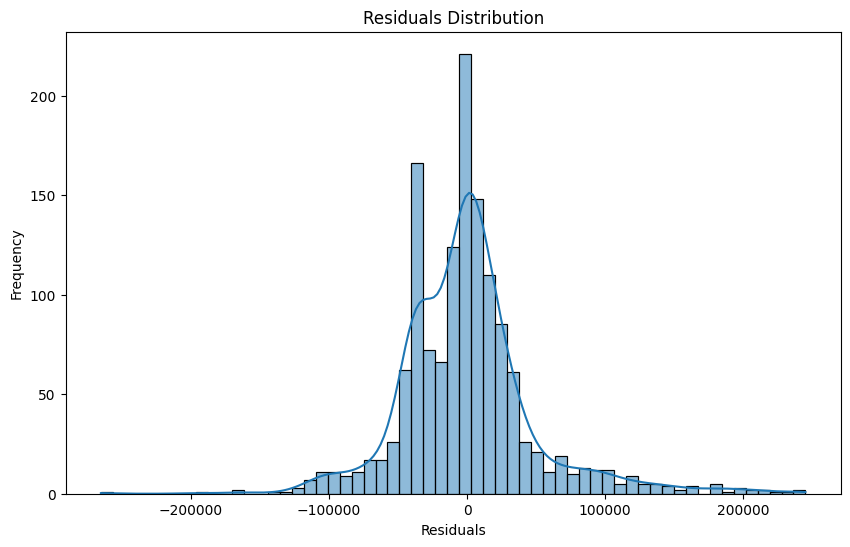

In [8]:
# Calculate residuals
residuals = y_test - y_pred.flatten()

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()


Overall, the model seems to be performing reasonably well, with most residuals clustered around zero. This suggests that the model is generally making accurate predictions.

## Exercise #3. Plot Predicted vs. Actual Values

### Predicted vs. Actual Values Visualizaition and Analysis

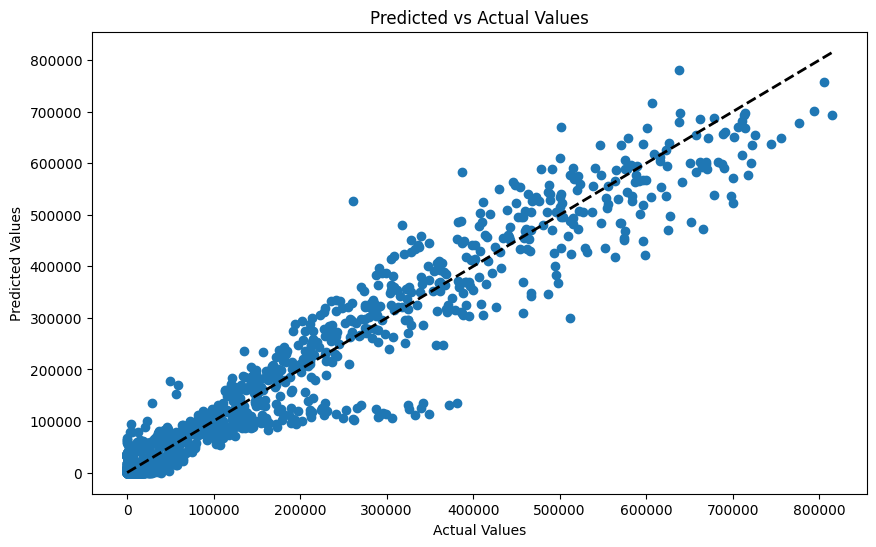

In [9]:


# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()


This scatter plot compares the predicted values against the actual values for your regression model. The plot indicates that your regression model performs well, with many predictions close to the actual values and no significant systematic bias. However, there are some outliers that suggest room for improvement. By investigating these outliers and potentially adjusting the model, you can further enhance the accuracy and robustness of your predictions.

In [10]:
'''=== predict the CLV =='''

# predict SALES using the test data
test_predictions = model.predict(X_test).flatten()
print(test_predictions)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[ 95676.8     99244.445   20476.1    ... 238695.92   535193.3
   4071.1262]


Predicted CLV: The array represents the predicted CLV for each customer in the test set.

High Values: Customers with high predicted values (e.g., 536,955) are expected to generate a high lifetime value for the company.
Low Values: Customers with low predicted values (e.g., 4,688) are expected to generate a lower lifetime value.

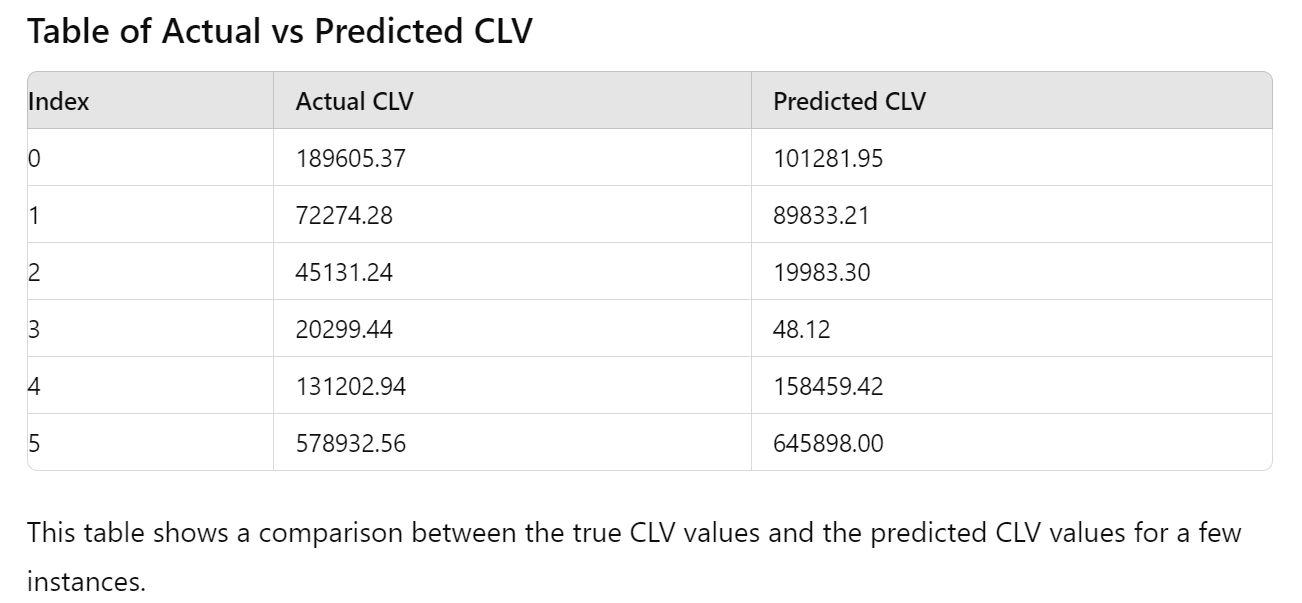

Table: The table format provides a clear and concise comparison between the actual and predicted values for a few instances, highlighting where the model is performing well and where it has significant errors.

Scatter Plot with Regression Line: The scatter plot provides a visual representation of the entire dataset, showing how well the predicted values align with the actual values. The regression line (in blue) indicates the trend and helps in visualizing the overall performance of the model. Points close to the line indicate accurate predictions, while points far from the line indicate larger prediction errors.

# Use Generative AI to Analyze the Visualizations

Use Generative AI's ability to generate new content and answer questions by copying and pasting any image into an AI Chatbot. Ask the AI Chatbot to interpret the image. The AI Chatbot will provide a detailed analysis for you - one that you can use for any analytics report.

Common AI Chatbots include:
Google’s Gemini
OpenAI’s Chat GPT

## Exercise #4 Use an AI Chatbot to Analyze the Visualizations!



1.   Copy the graphs you have just plotted (right-click on image and select "copy image")
2.   Open up a Chat AI that can accept image prompts.
3. Paste the image into the Chat AI and write "Interpret this".



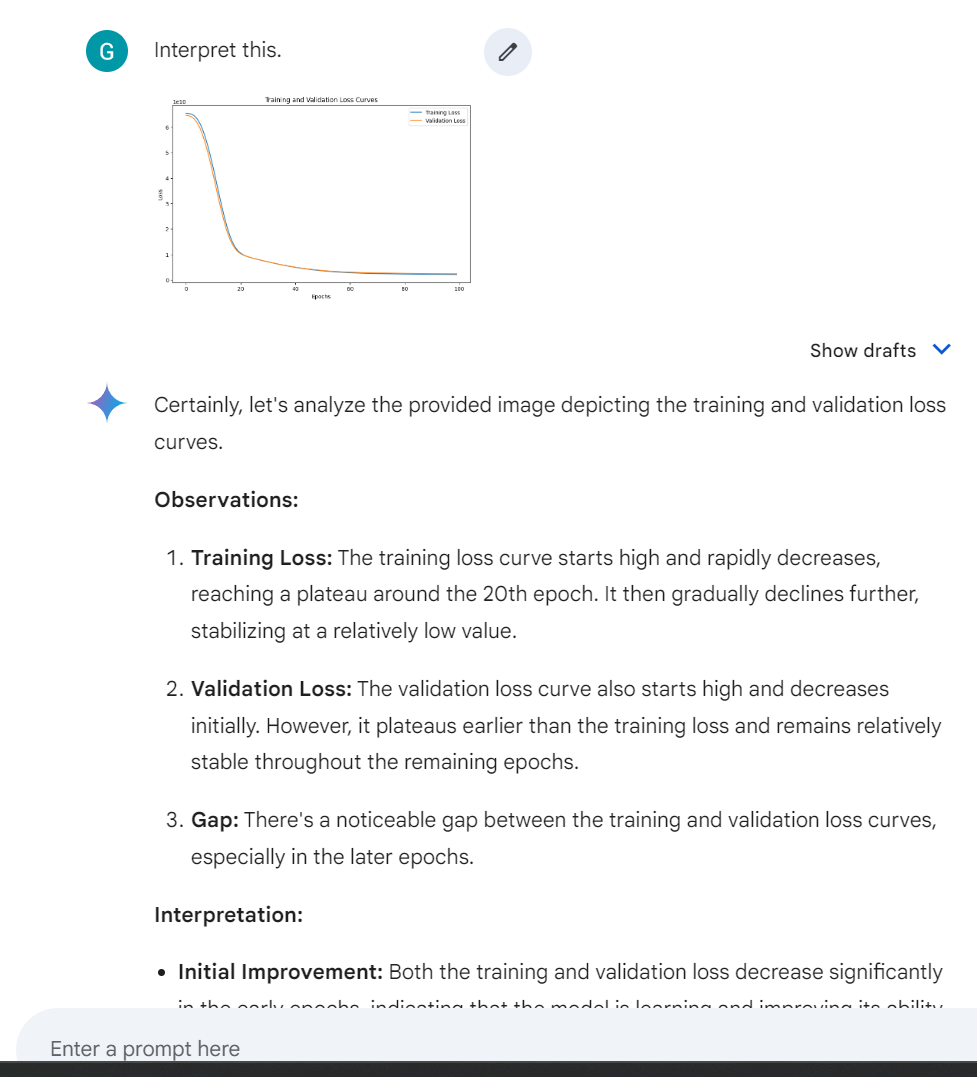